# Laboratorio 3: Deep Learning

#### Mario de León 19019
#### Javier Valle 20159

### Imports necesarios

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Ejercicio 1

## Inciso 1: haciendo análisis exploratorio. Para el análisis exploratorio usar test. Para lo demás se puede usar train.

In [2]:
# Abriendo el csv.

data = pd.read_csv("test.csv")

data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filtrando la data

In [3]:
# Filtrar las columnas de píxeles entre 0 y 783
pixel_columns = [f"pixel{i}" for i in range(784)]  # Columnas de pixel0 a pixel783
filtered_data = data[pixel_columns]

#filtered_data

# Resumen estadístico
print(filtered_data.describe())

        pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   
count  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  \
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776   
count  28000.0  28000.0  ...  28000.000000  28000.000000  28000.000000  \
mean       0.0      0.0  ...      0.164607      0.073214      0.028036   
std        0.0      0.0  ...      5.473293      

#### Haciendo un histograma de los datos.

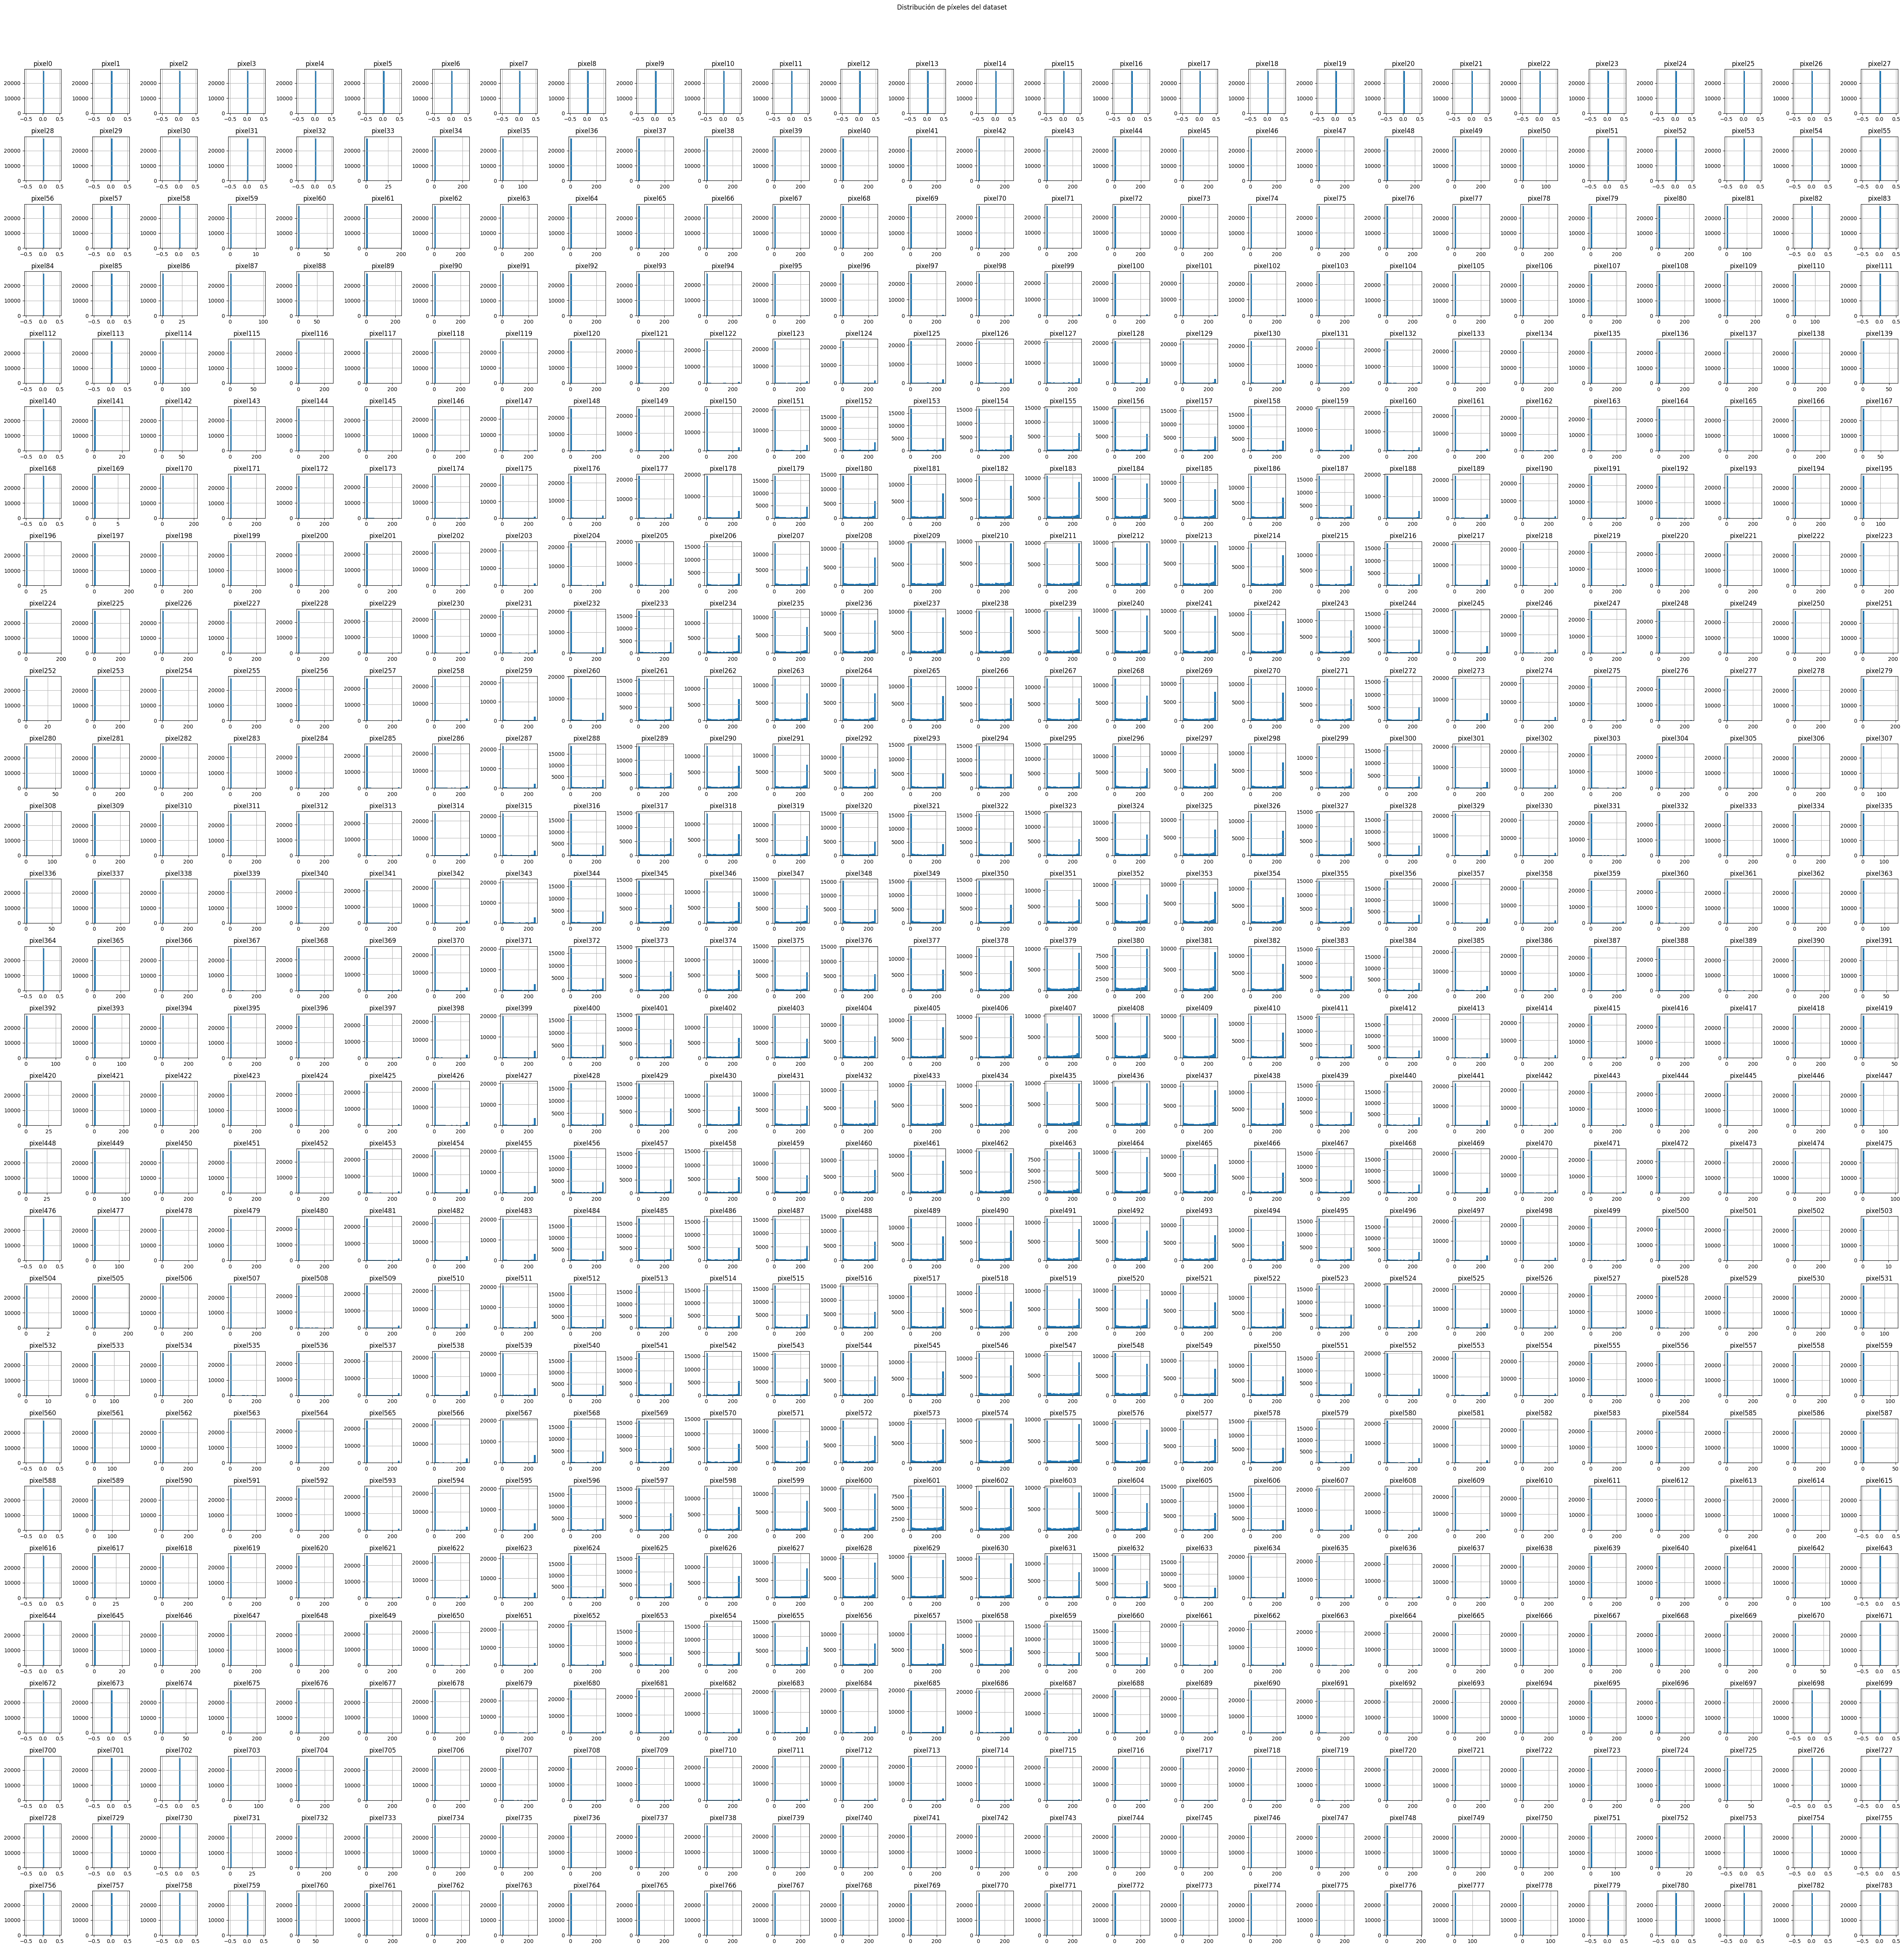

In [4]:
# Histogramas
filtered_data.hist(bins=20, figsize=(50, 50))
plt.suptitle("Distribución de píxeles del dataset", y=1.02)
plt.tight_layout()
plt.show()

##### Haciendo una matriz de correlación entre los datos.

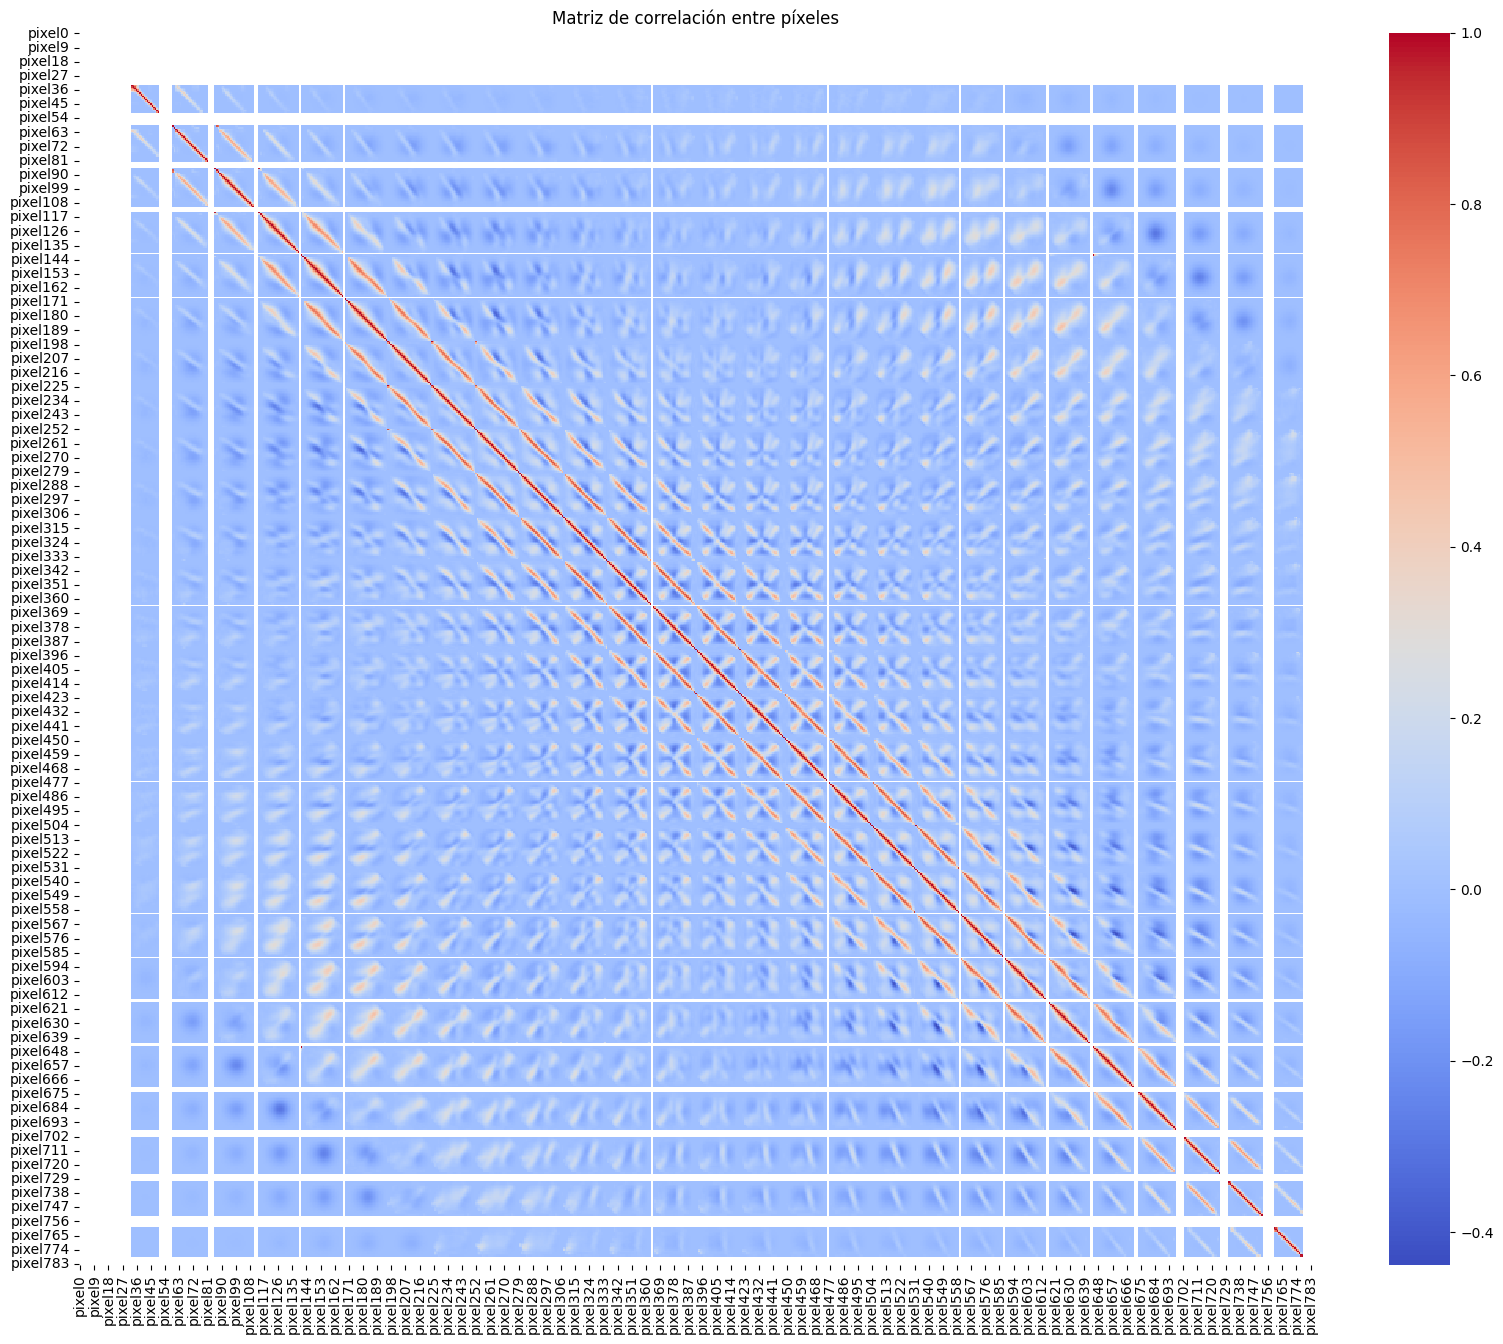

In [5]:
# Matriz de correlación
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True, annot=False)
plt.title("Matriz de correlación entre píxeles")
plt.show()

#### Haciendo diegrama de dispersión.

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:116: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[

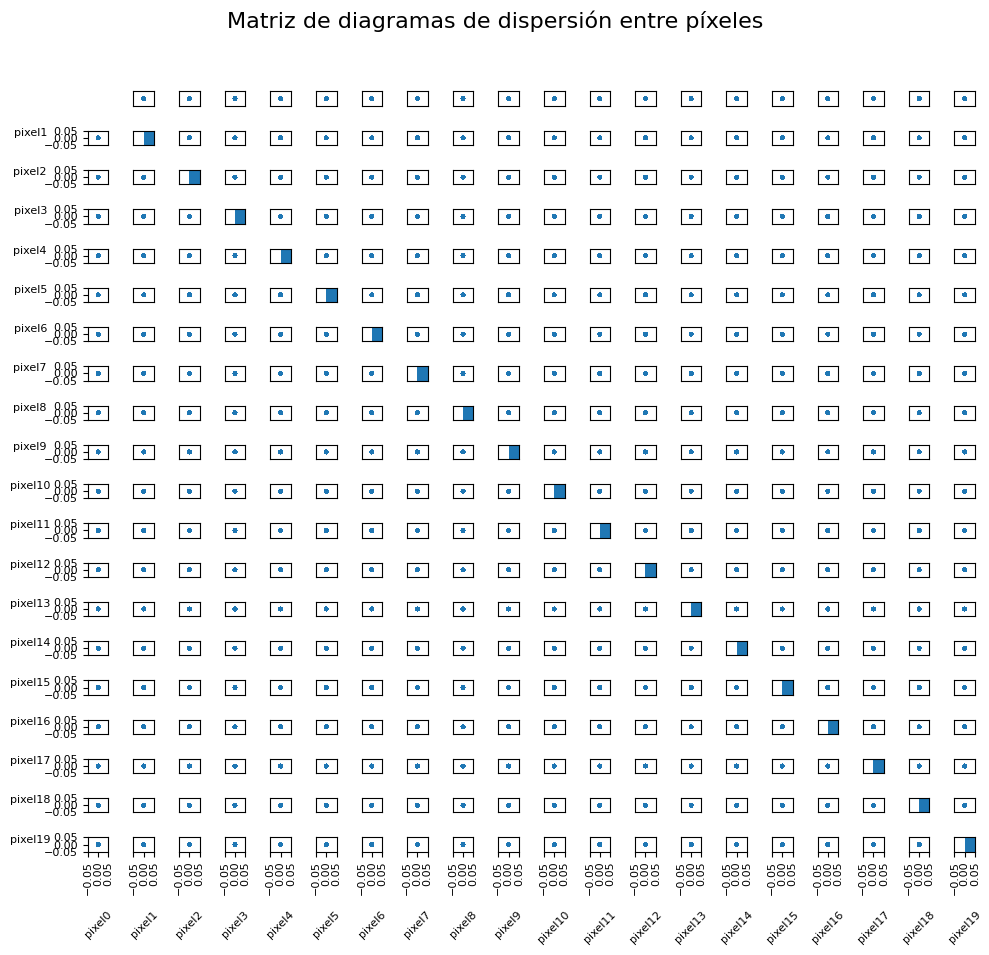

In [6]:
num_columns = 20  # Seleccionando nada más 20 columnas.
pixel_columns = [f"pixel{i}" for i in range(num_columns)]

# Crear una matriz de diagramas de dispersión
scatter_matrix = pd.plotting.scatter_matrix(data[pixel_columns], alpha=0.2, figsize=(10, 10), diagonal='hist')

# Ajustar las etiquetas en la diagonal
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10

plt.suptitle("Matriz de diagramas de dispersión entre píxeles", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Hacinedo un análisis de frecuencia al dataset.

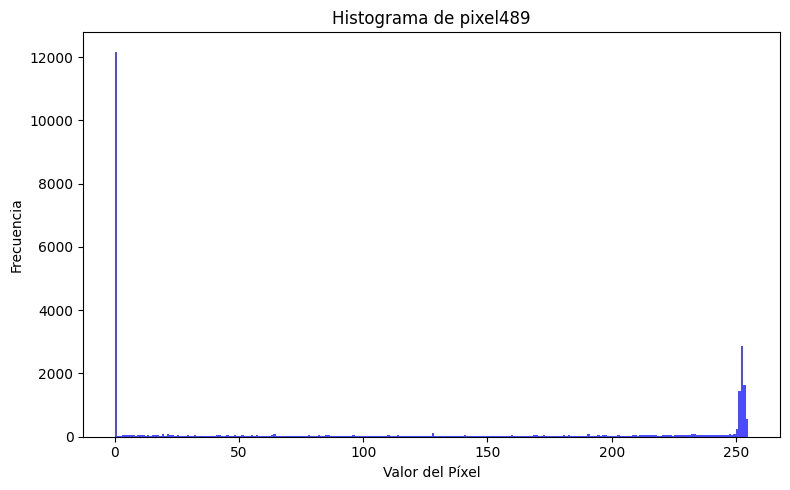

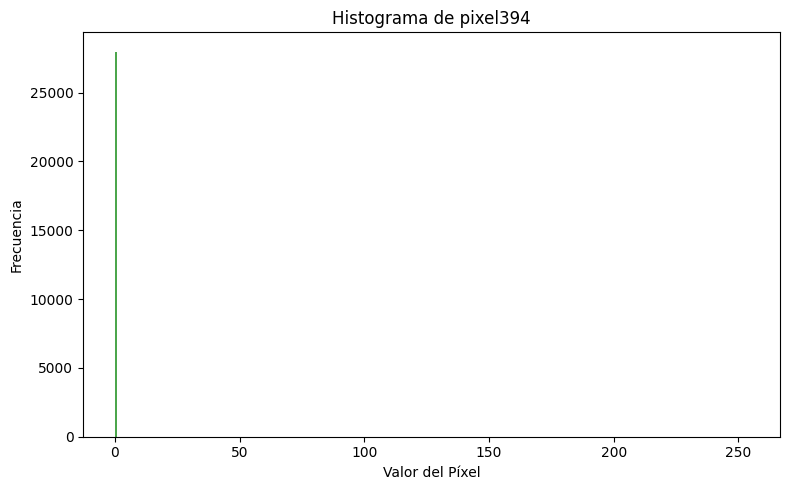

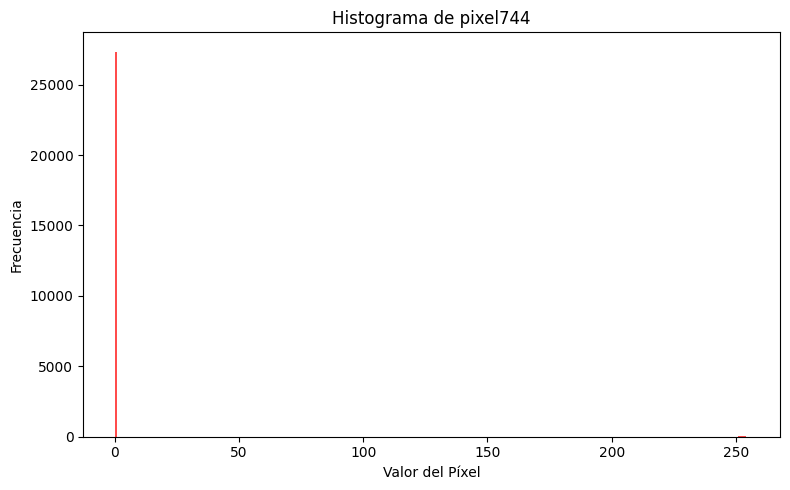

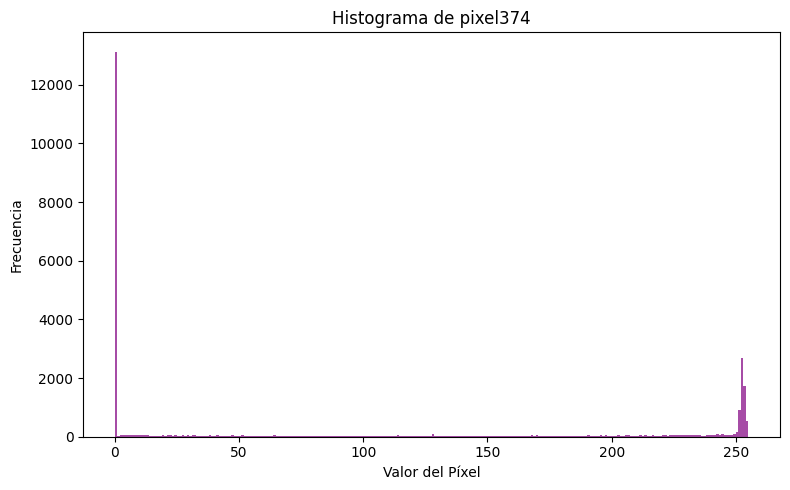

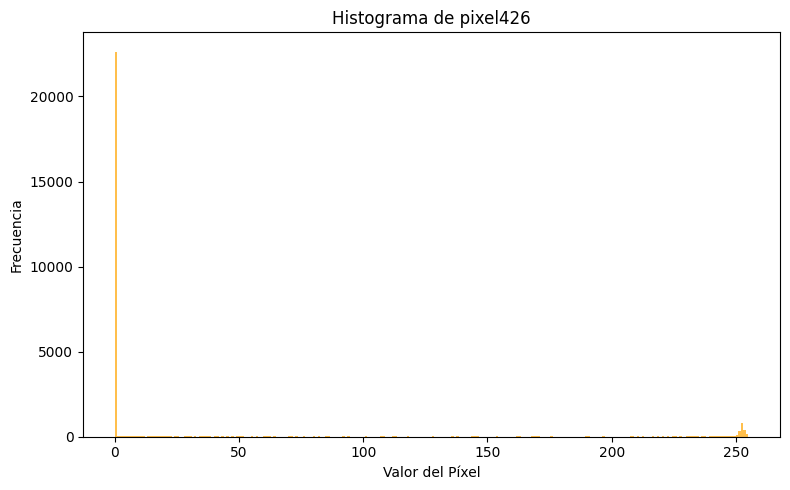

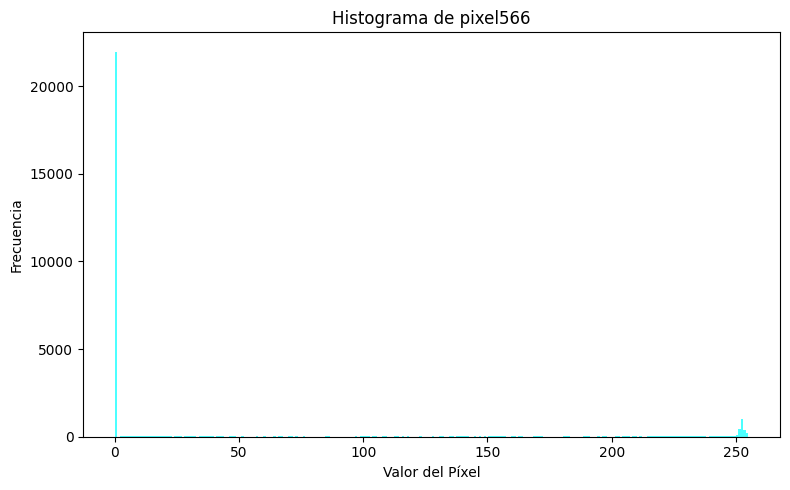

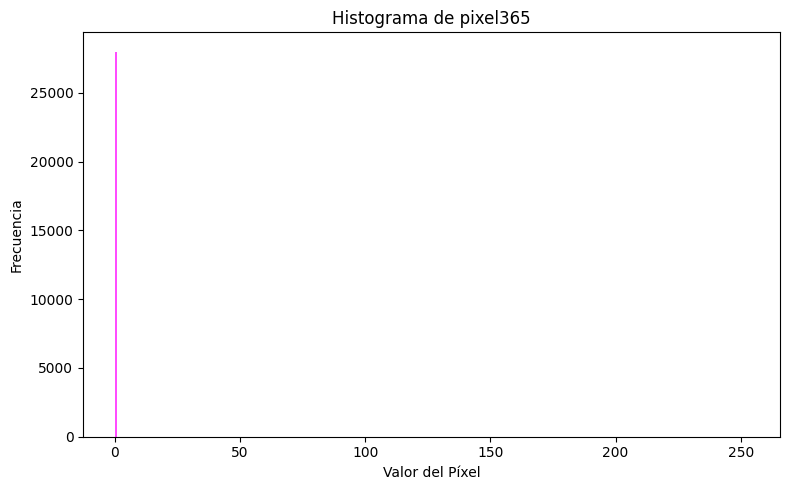

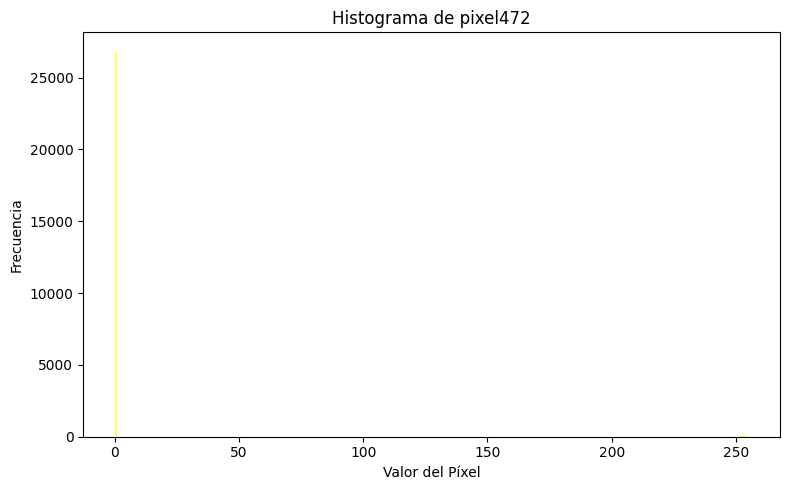

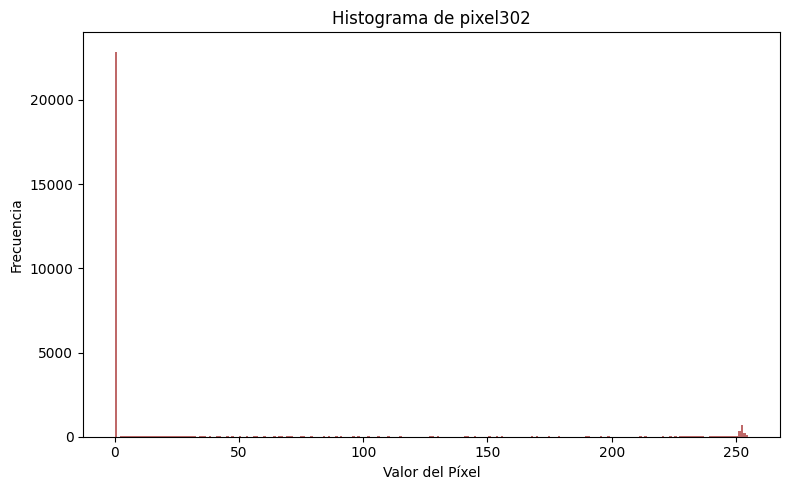

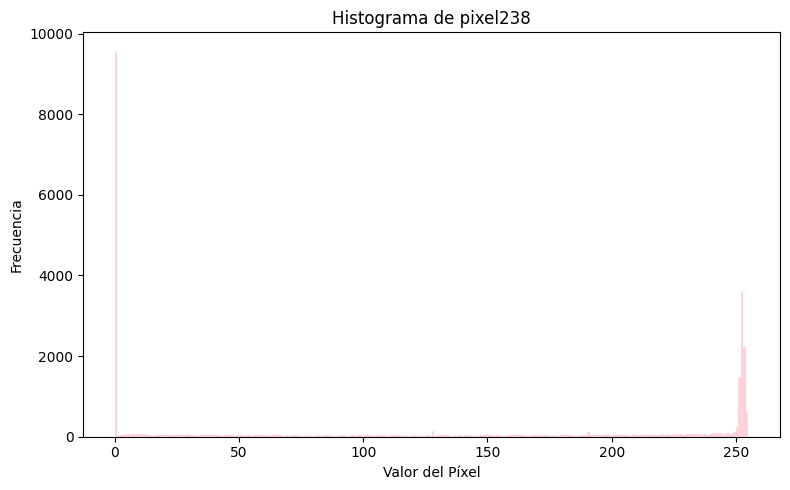

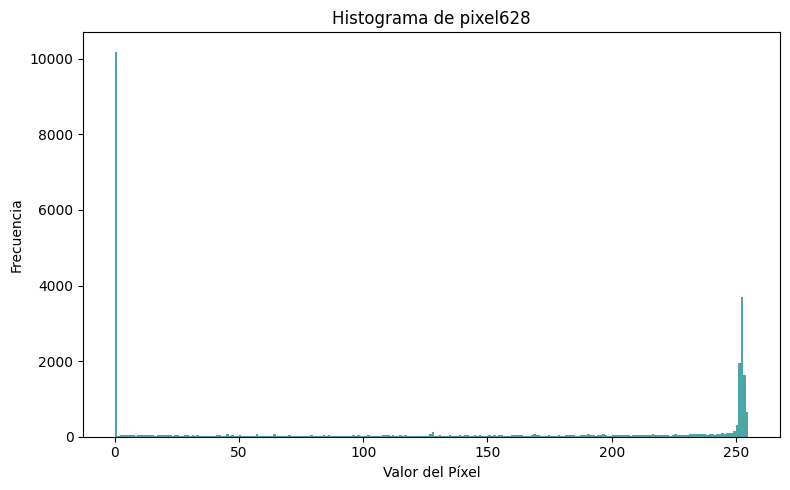

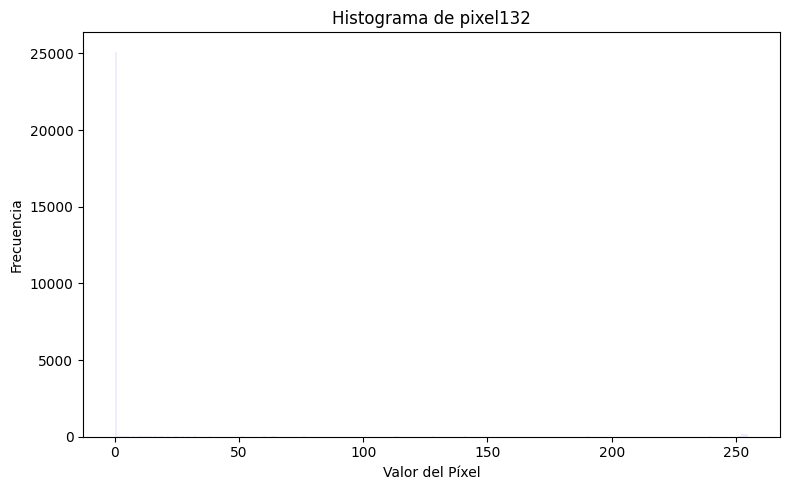

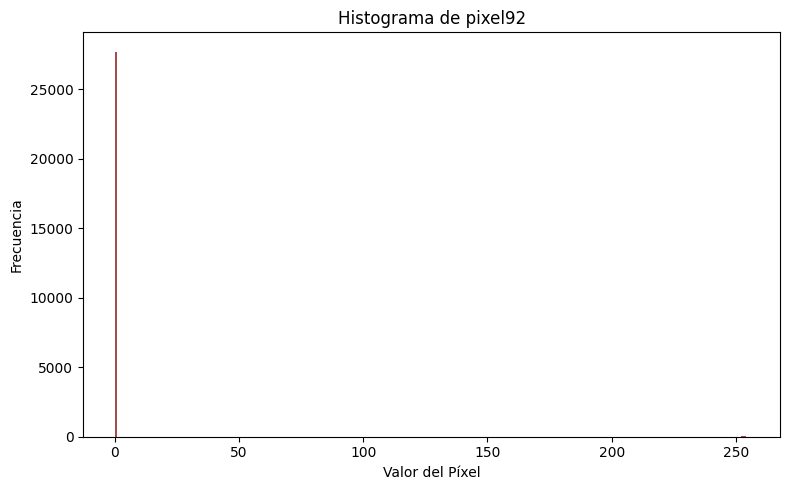

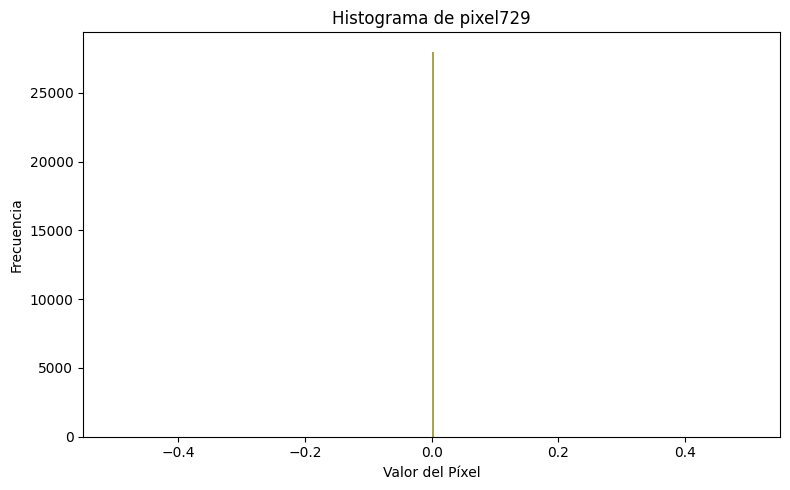

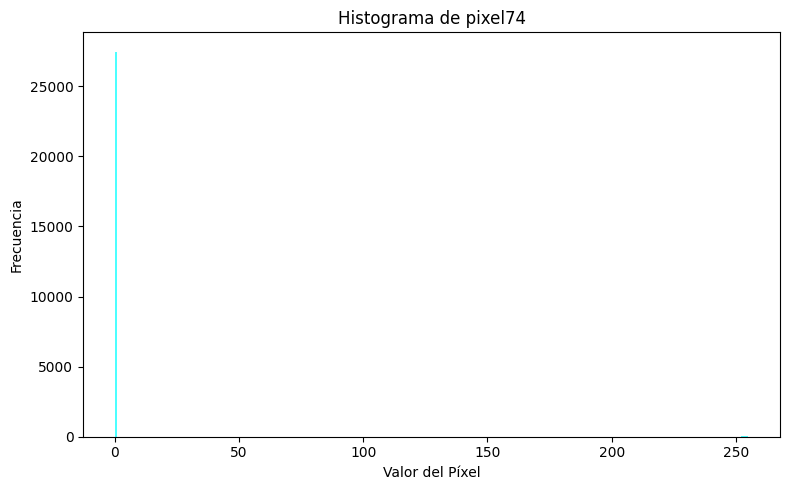

In [7]:
# Seleccionando 5 columnas aleatorias
random_columns = np.random.choice(data.columns[1:], size=15, replace=False)

# Colores para los histogramas
color_list = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'teal', 'lavender', 'maroon', 'olive', 'aqua'
]

# Generar histogramas uno por uno
for i, column in enumerate(random_columns):
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=256, color=color_list[i], alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valor del Píxel')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

### Dividiendo los datos en entrenamiento y prueba

In [8]:
# Crear una lista de nombres de columnas de píxeles
pixel_columns = [f"pixel{i}" for i in range(784)]

# Dividir el dataset en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de datos
print("Conjunto de entrenamiento:", train_data.shape)
print("Conjunto de prueba:", test_data.shape)

Conjunto de entrenamiento: (22400, 784)
Conjunto de prueba: (5600, 784)


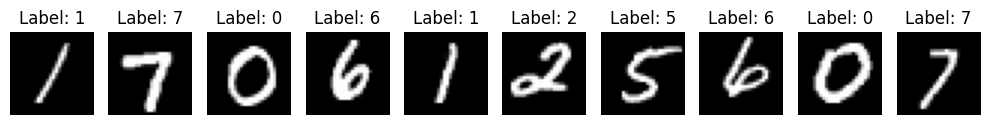

In [9]:
# Leyendo los datos del train.
data = pd.read_csv('train.csv')

# Seleccionando algunas imágenes.
num_images_to_visualize = 10
selected_indices = np.random.choice(len(data), num_images_to_visualize, replace=False)

# Visualizando las imágenes.
plt.figure(figsize=(10, 5))
for i, idx in enumerate(selected_indices, 1):
    plt.subplot(1, num_images_to_visualize, i)
    image_pixels = data.iloc[idx, 1:].values  # Excluyendo la columna de etiquetas
    image = image_pixels.reshape(28, 28)  # Reshape a una matriz 28x28
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {data.iloc[idx, 0]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Inciso 2: Creando un modelo simple de redes neuronales.

Epoch 1/20
840/840 [==============================] - 6s 5ms/step - loss: 0.3041 - accuracy: 0.9090 - val_loss: 0.1830 - val_accuracy: 0.9494
Epoch 2/20
840/840 [==============================] - 4s 4ms/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.1520 - val_accuracy: 0.9583
Epoch 3/20
840/840 [==============================] - 4s 4ms/step - loss: 0.0873 - accuracy: 0.9727 - val_loss: 0.1921 - val_accuracy: 0.9551
Epoch 4/20
840/840 [==============================] - 4s 4ms/step - loss: 0.0718 - accuracy: 0.9773 - val_loss: 0.2024 - val_accuracy: 0.9601
Epoch 5/20
840/840 [==============================] - 4s 5ms/step - loss: 0.0588 - accuracy: 0.9810 - val_loss: 0.1952 - val_accuracy: 0.9607
Epoch 6/20
840/840 [==============================] - 9s 10ms/step - loss: 0.0503 - accuracy: 0.9849 - val_loss: 0.1867 - val_accuracy: 0.9621
Epoch 7/20
840/840 [==============================] - 9s 11ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.2015 - val_accuracy: 0.9622
Epoc

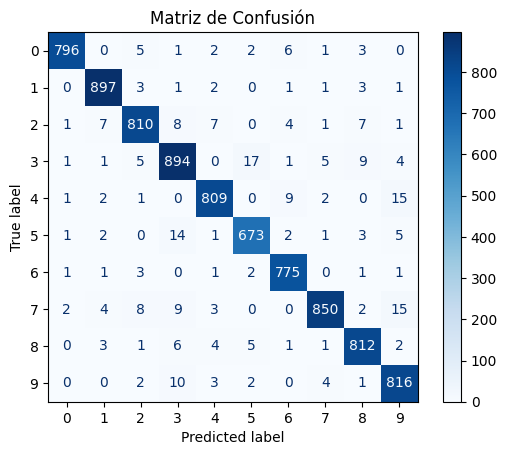

In [10]:
data = pd.read_csv("train.csv")

# Separando las características (píxeles) y etiquetas
X = data.iloc[:, 1:]  # Todas las columnas de píxeles
y = data.iloc[:, 0]   # Columna de etiquetas

# Obteniendo los datos del entrenamiento/prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),  # Capa 1 con 256 neuronas
    tf.keras.layers.Dense(128, activation='relu'),  # Capa 2 con 128 neuronas
    tf.keras.layers.Dense(64, activation='relu'),   # Capa 3 con 64 neuronas
    tf.keras.layers.Dense(32, activation='relu'),   # Capa 4 con 32 neuronas
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluando el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Predeciendo las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculando y mostrando la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.unique(y_test))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

## Inciso 3: Haciendo un modelo de deep learning.

Epoch 1/20
840/840 [==============================] - 4s 4ms/step - loss: 0.5866 - accuracy: 0.8224 - val_loss: 0.2332 - val_accuracy: 0.9342
Epoch 2/20
840/840 [==============================] - 3s 3ms/step - loss: 0.3063 - accuracy: 0.9113 - val_loss: 0.1931 - val_accuracy: 0.9452
Epoch 3/20
840/840 [==============================] - 3s 3ms/step - loss: 0.2450 - accuracy: 0.9307 - val_loss: 0.1928 - val_accuracy: 0.9512
Epoch 4/20
840/840 [==============================] - 3s 3ms/step - loss: 0.2103 - accuracy: 0.9399 - val_loss: 0.1688 - val_accuracy: 0.9571
Epoch 5/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1887 - accuracy: 0.9475 - val_loss: 0.1716 - val_accuracy: 0.9583
Epoch 6/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1605 - accuracy: 0.9537 - val_loss: 0.1708 - val_accuracy: 0.9592
Epoch 7/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1454 - accuracy: 0.9577 - val_loss: 0.1925 - val_accuracy: 0.9610
Epoch 

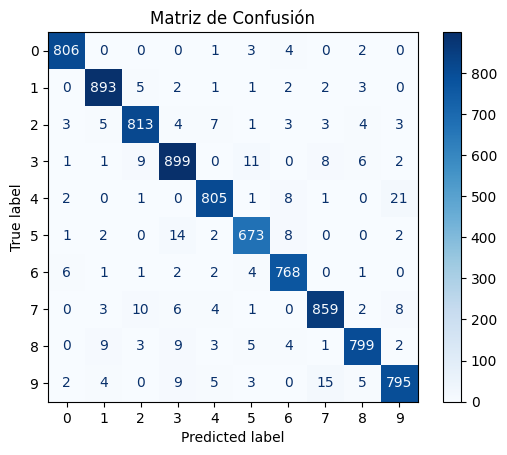

In [11]:
data = pd.read_csv("train.csv")

X = data.iloc[:, 1:]  # Todas las columnas de píxeles
y = data.iloc[:, 0]   # Columna de etiquetas

# Dividiendo el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creando el modelo de la red neuronal profunda
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predeciendo las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculando y mostrando la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.unique(y_test))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Inciso 4: Haciendo un modelo con otro algoritmo.

Precisión en el conjunto de prueba: 0.9638095238095238


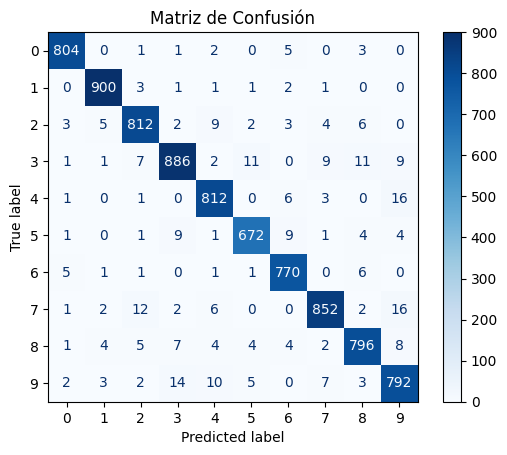

In [12]:
data = pd.read_csv("train.csv")

# Separando características (píxeles) y etiquetas
X = data.iloc[:, 1:]  # Todas las columnas de píxeles
y = data.iloc[:, 0]   # Columna de etiquetas

# Dividiendo el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creando el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Entrenando el modelo
rf_model.fit(X_train_scaled, y_train)

# Evaluando el modelo en el conjunto de prueba
accuracy = rf_model.score(X_test_scaled, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

# Predeciendo las etiquetas en el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)

# Calculando y mostrando la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.unique(y_test))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

## Inciso 5: Pruebe el mejor modelo ingresando imágenes de dígitos hechos a mano por los integrantes del grupo. Discuta el desempeño de su modelo y los resultados. 

Epoch 1/20
840/840 [==============================] - 5s 5ms/step - loss: 0.3088 - accuracy: 0.9074 - val_loss: 0.1782 - val_accuracy: 0.9510
Epoch 2/20
840/840 [==============================] - 4s 4ms/step - loss: 0.1323 - accuracy: 0.9599 - val_loss: 0.1844 - val_accuracy: 0.9512
Epoch 3/20
840/840 [==============================] - 4s 4ms/step - loss: 0.0883 - accuracy: 0.9722 - val_loss: 0.1680 - val_accuracy: 0.9606
Epoch 4/20
840/840 [==============================] - 4s 4ms/step - loss: 0.0667 - accuracy: 0.9793 - val_loss: 0.2087 - val_accuracy: 0.9540
Epoch 5/20
840/840 [==============================] - 4s 5ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.2040 - val_accuracy: 0.9583
Epoch 6/20
840/840 [==============================] - 4s 5ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.1929 - val_accuracy: 0.9644
Epoch 7/20
840/840 [==============================] - 4s 5ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.2318 - val_accuracy: 0.9583
Epoch 

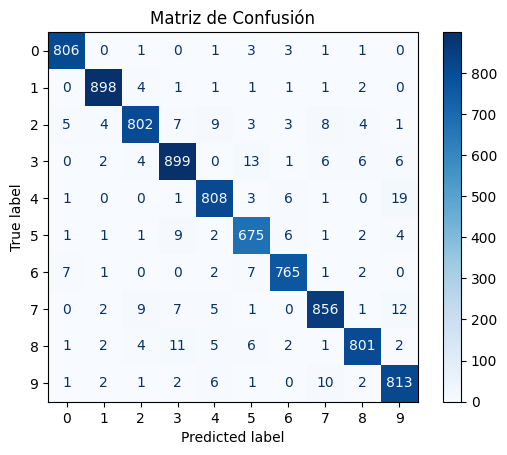

In [13]:
data = pd.read_csv("train.csv")

# Separando las características (píxeles) y etiquetas
X = data.iloc[:, 1:]  # Todas las columnas de píxeles
y = data.iloc[:, 0]   # Columna de etiquetas

# Obteniendo los datos del entrenamiento/prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),  # Capa 1 con 256 neuronas
    tf.keras.layers.Dense(128, activation='relu'),  # Capa 2 con 128 neuronas
    tf.keras.layers.Dense(64, activation='relu'),   # Capa 3 con 64 neuronas
    tf.keras.layers.Dense(32, activation='relu'),   # Capa 4 con 32 neuronas
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenando el modelo
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluando el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Predeciendo las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculando y mostrando la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_classes)
confusion_display = ConfusionMatrixDisplay(confusion, display_labels=np.unique(y_test))
confusion_display.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

##### El modelo que presenta mejor rendimiento, sin duda, es el de redes neuronales simples, dado que tiene el accuracy más alto de los tres modelos generados. Asimismo, presenta el loss más bajo de los tres mismos modelos generados. Por otro lado, es importante mencionar que este modelo es el menos tardado para realizar las predicciones del dataset.

## Inciso 6: Haga un informe donde incluya el análisis exploratorio, la descripción de los modelos, la efectividad de cada uno y la comparación entre ellos.

##### Como se pudo observar a lo largo del código anterior, el datsest brindado consta de información de imágenes que contienen números. Asimismo, se puede observar que el dataset train presenta un excelente comportamiento al momento de aplicarle una red neuronal para predecir que digito numérico está presente en cada imagen. Asimismo, es importante mencionar que las redes neuronales pueden llegar a ser bastante útiles para nuevas imágenes que no estén presentes en el dataset.

##### Revisar el inciso 1 del ejercicio 2. 
##### Por otro lado, es importante mencionar que el comportamiento de los modelos en el presente laboratorio presentaron un mejor resultado que los modelos que el laboratorio anterior. Asimismo, es importante mencionar que, aún así, el segundo modelo del segundo inciso fue el que mejores resultados presentó en base a su comportamiento y en base a sus resultados obtenidos.

## Ejercicio 2

## Inciso 1: Utilice los conjuntos de entrenamiento y prueba de una de las series que utilizó en el Laboratorio 2.

In [14]:
# Crear una lista de nombres de columnas de píxeles
pixel_columns = [f"pixel{i}" for i in range(784)]

# Dividir el dataset en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de datos
print("Conjunto de entrenamiento:", train_data.shape)
print("Conjunto de prueba:", test_data.shape)

Conjunto de entrenamiento: (33600, 785)
Conjunto de prueba: (8400, 785)


## Inciso 2: Haga al menos 2 modelos con configuraciones diferentes usando LSTM. Úselos para predecir.

In [18]:
# Leer los datos
data = pd.read_csv("train.csv")

# Crear una lista de nombres de columnas de píxeles
pixel_columns = [f"pixel{i}" for i in range(784)]

# Dividir el dataset en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Obtener características y etiquetas
X_train = train_data[pixel_columns].values
y_train = train_data["label"].values
X_test = test_data[pixel_columns].values
y_test = test_data["label"].values

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape para que coincida con el formato de entrada de LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 28, 28)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 28, 28)

# Modelo LSTM 1
model1 = Sequential()
model1.add(LSTM(128, input_shape=(28, 28), activation='relu', return_sequences=True))
model1.add(LSTM(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
840/840 [==============================] - 38s 41ms/step - loss: 1.6518 - accuracy: 0.6192 - val_loss: 1.2213 - val_accuracy: 0.6506
Epoch 2/10
840/840 [==============================] - 32s 38ms/step - loss: 0.4716 - accuracy: 0.8571 - val_loss: 0.3925 - val_accuracy: 0.9034
Epoch 3/10
840/840 [==============================] - 34s 40ms/step - loss: 0.3761 - accuracy: 0.9121 - val_loss: 0.3438 - val_accuracy: 0.9271
Epoch 4/10
840/840 [==============================] - 33s 39ms/step - loss: 4.0767 - accuracy: 0.4044 - val_loss: 1.6552 - val_accuracy: 0.4192
Epoch 5/10
840/840 [==============================] - 36s 43ms/step - loss: 1.3807 - accuracy: 0.5325 - val_loss: 1.0441 - val_accuracy: 0.6619
Epoch 6/10
840/840 [==============================] - 49s 58ms/step - loss: 0.8603 - accuracy: 0.7271 - val_loss: 0.7052 - val_accuracy: 0.7868
Epoch 7/10
840/840 [==============================] - 36s 43ms/step - loss: 0.6301 - accuracy: 0.8054 - val_loss: 0.5397 - val_accuracy:

In [19]:
# Modelo LSTM 2
model2 = Sequential()
model2.add(LSTM(64, input_shape=(28, 28), activation='tanh', return_sequences=True))
model2.add(LSTM(32, activation='tanh'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluación de los modelos en el conjunto de prueba
loss1, accuracy1 = model1.evaluate(X_test_reshaped, y_test)
print("Modelo 1 - Pérdida en el conjunto de prueba:", loss1)
print("Modelo 1 - Precisión en el conjunto de prueba:", accuracy1)

loss2, accuracy2 = model2.evaluate(X_test_reshaped, y_test)
print("Modelo 2 - Pérdida en el conjunto de prueba:", loss2)
print("Modelo 2 - Precisión en el conjunto de prueba:", accuracy2)

Epoch 1/10
840/840 [==============================] - 26s 25ms/step - loss: 0.5613 - accuracy: 0.8242 - val_loss: 0.2083 - val_accuracy: 0.9405
Epoch 2/10
840/840 [==============================] - 20s 24ms/step - loss: 0.1548 - accuracy: 0.9543 - val_loss: 0.1415 - val_accuracy: 0.9573
Epoch 3/10
840/840 [==============================] - 20s 24ms/step - loss: 0.1025 - accuracy: 0.9690 - val_loss: 0.1254 - val_accuracy: 0.9647
Epoch 4/10
840/840 [==============================] - 21s 25ms/step - loss: 0.0729 - accuracy: 0.9785 - val_loss: 0.1005 - val_accuracy: 0.9726
Epoch 5/10
840/840 [==============================] - 20s 24ms/step - loss: 0.0618 - accuracy: 0.9818 - val_loss: 0.0973 - val_accuracy: 0.9707
Epoch 6/10
840/840 [==============================] - 20s 24ms/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0859 - val_accuracy: 0.9743
Epoch 7/10
840/840 [==============================] - 20s 24ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0879 - val_accuracy:

## Inciso 2: ¿Cuál predijo mejor?¿Son mejores que los modelos creados en el laboratorio pasado?¿Cómo lo determinaron?

#### 263/263 [==============================] - 4s 15ms/step - loss: 0.4506 - accuracy: 0.8929
#### Modelo 1 - Pérdida en el conjunto de prueba: 0.4506094455718994
#### Modelo 1 - Precisión en el conjunto de prueba: 0.8928571343421936
#### 263/263 [==============================] - 4s 10ms/step - loss: 0.1412 - accuracy: 0.9627
#### Modelo 2 - Pérdida en el conjunto de prueba: 0.14124642312526703
#### Modelo 2 - Precisión en el conjunto de prueba: 0.9627380967140198
####
#### Primera pregunta.
#### El modelo que mejor predijo fue el segundo, dado que la pérdida fue mucho menor y la precisión fue mucho mejor.
####
#### Segunda pregunta.
#### Dado los resultados obtenidos, se puede observar que los modelos del presente laboratorio son mejores que los del laboratorio anterior.
####
#### Tercera pregunta.
#### La forma en la que determinamos el mejor modelo fue analizando el loss y el accuracy.